<b>Assignment 1</b> 
<br>
<Br>
Plotting 100 samples each of the following distributions:<br>
Normal, poisson, binomial, chisquare, logistic
<br>
<br>
<i>Heavily adapted from Federica's skeleton notebook (https://github.com/fedhere/PUI2017_fb55/tree/master/HW3_fb55)</i>

<b>Initialization<b/>

In [16]:
from __future__ import print_function
__author__= 'fbb'

import pylab as plt
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
np.random.seed(999)

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99L,)


<b>Chi-Square Distribution</b> (from Federica's example)

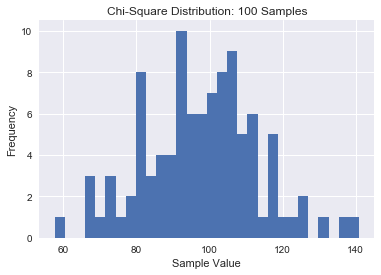

In [22]:
mymean = 100
df = mymean

# Init empty dictionary
md = {}
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
plt.hist(md['chisq'], bins = 30)
plt.ylabel('Frequency')
plt.xlabel('Sample Value')
plt.title('Chi-Square Distribution: 100 Samples')

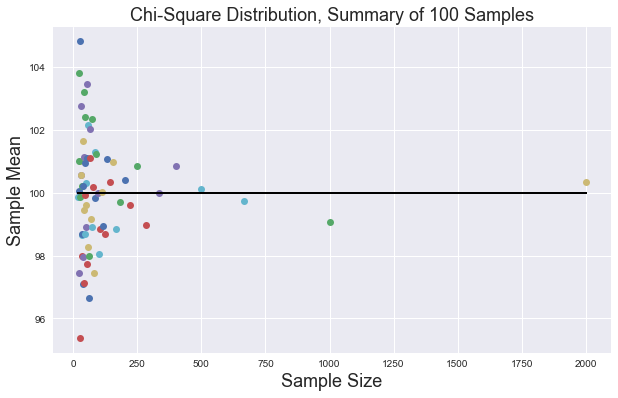

In [25]:
# Demonstration of central limit theorem
dist_dict = {}
dist_dict['chisq'] = {} 

for n in mysize:
    dist_dict['chisq'][n] = np.random.chisquare(df, size = n)

dist_dict['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dist_dict['chisq']:
    if not type(nn) == str:
        dist_dict['chisq']['means'][nn] = dist_dict['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, dist_dict['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('Sample Size', fontsize=18)
        axchisq_mu_n.set_ylabel('Sample Mean', fontsize=18)
        axchisq_mu_n.set_title('Chi-Square Distribution, Summary of 100 Samples', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

General observation from the summary plots:<br>
As the sample size increases, the sample mean approaches the population mean (less variation from the mean as the sample size increases)

<b>Normal Distribution</b>

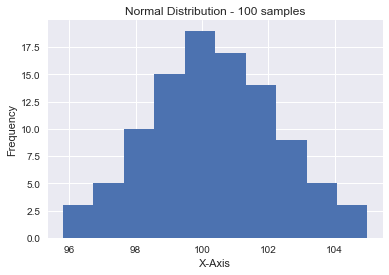

In [20]:
dist_dict['normal'] = np.random.normal(loc=100, scale=2, size=100)

plt.hist(dist_dict['normal'])
plt.xlabel('Sample Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution - 100 samples')

In [23]:
print("Normal distribution with a mean of {:.2f} and a standard deviation of {:.2f}."\
      .format(dist_dict['normal'].mean(), dist_dict['normal'].std()))

Normal distribution with a mean of 100.38 and a standard deviation of 1.94.


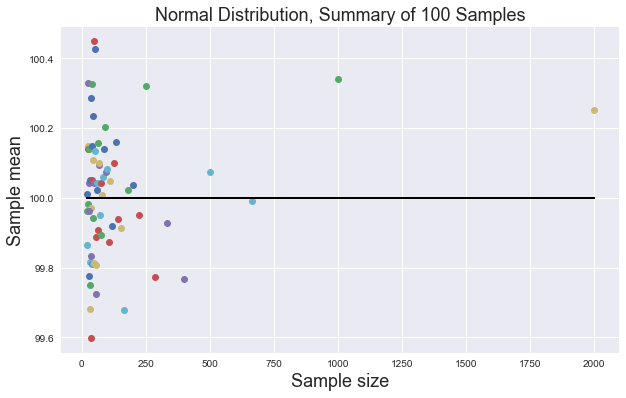

In [24]:
dist_dict['normal'] = {} 

for n in mysize:
    dist_dict['normal'][n] = np.random.normal(loc=100, scale=2, size=100)
    
dist_dict['normal']['means'] = {}
ax_norm = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dist_dict['normal']:
    if not type(nn) == str:
        dist_dict['normal']['means'][nn] = dist_dict['normal'][nn].mean()
        #and plot it
        ax_norm.plot(nn, dist_dict['normal']['means'][nn], 'o')
        ax_norm.set_xlabel('Sample size', fontsize=18)
        ax_norm.set_ylabel('Sample mean', fontsize=18)
        ax_norm.set_title('Normal Distribution, Summary of 100 Samples', fontsize=18)
        ax_norm.plot([min(mysize), max(mysize)], [df, df], 'k')

<b>Poisson Distribution</b>

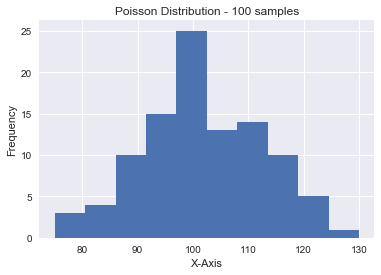

In [26]:
dist_dict['poisson'] = np.random.poisson(lam=100, size=100)

plt.hist(dist_dict['poisson'])
plt.xlabel('X-Axis')
plt.ylabel('Frequency')
plt.title('Poisson Distribution - 100 samples')

In [27]:
print("Poisson distribution with a mean of {:.2f} and a standard deviation of {:.2f}."\
      .format(dist_dict['poisson'].mean(), dist_dict['poisson'].std()))

Poisson distribution with a mean of 101.61 and a standard deviation of 10.75.


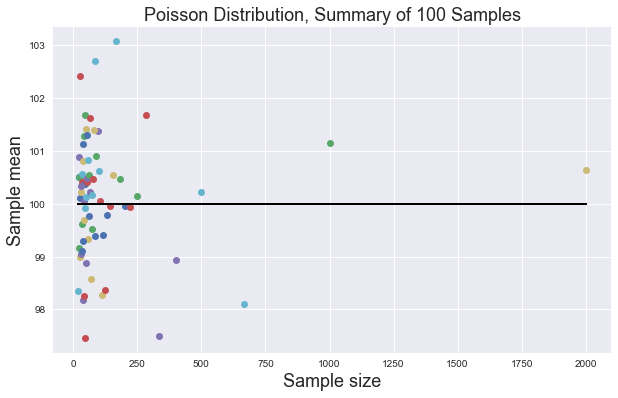

In [28]:
dist_dict['poisson'] = {} 

for n in mysize:
    dist_dict['poisson'][n] = np.random.poisson(lam=100, size=100)
    
dist_dict['poisson']['means'] = {}
ax_norm = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dist_dict['poisson']:
    if not type(nn) == str:
        dist_dict['poisson']['means'][nn] = dist_dict['poisson'][nn].mean()

        ax_norm.plot(nn, dist_dict['poisson']['means'][nn], 'o')
        ax_norm.set_xlabel('Sample size', fontsize=18)
        ax_norm.set_ylabel('Sample mean', fontsize=18)
        ax_norm.set_title('Poisson Distribution, Summary of 100 Samples', fontsize=18)
        ax_norm.plot([min(mysize), max(mysize)], [df, df], 'k')

<b>Binomial Distribution</b>

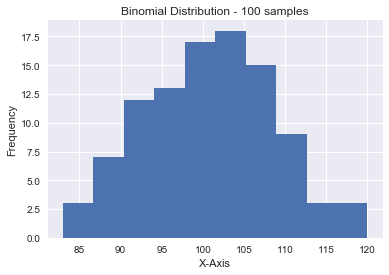

In [29]:
dist_dict['binomial'] = np.random.binomial(n=200, p=0.5, size=100)

plt.hist(dist_dict['binomial'])
plt.xlabel('X-Axis')
plt.ylabel('Frequency')
plt.title('Binomial Distribution - 100 samples')

In [30]:
print("Binomial distribution with a mean of {:.2f} and a standard deviation of {:.2f}."\
      .format(dist_dict['binomial'].mean(), dist_dict['binomial'].std()))

Binomial distribution with a mean of 100.99 and a standard deviation of 7.87.


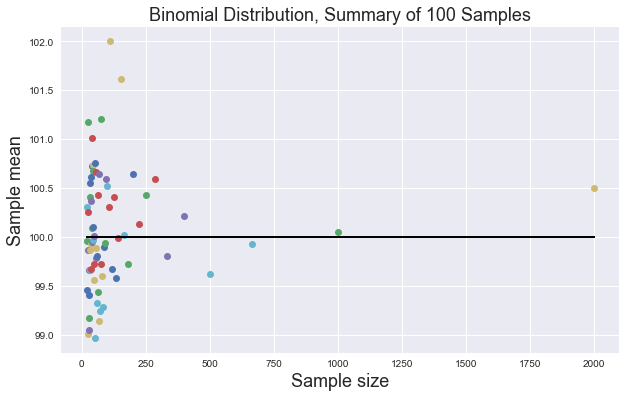

In [32]:
dist_dict['binomial'] = {} 

for n in mysize:
    dist_dict['binomial'][n] = np.random.binomial(n=200, p=0.5, size=100)
    
dist_dict['binomial']['means'] = {}
ax_norm = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dist_dict['binomial']:
    if not type(nn) == str:
        dist_dict['binomial']['means'][nn] = dist_dict['binomial'][nn].mean()
        
        ax_norm.plot(nn, dist_dict['binomial']['means'][nn], 'o')
        ax_norm.set_xlabel('Sample size', fontsize=18)
        ax_norm.set_ylabel('Sample mean', fontsize=18)
        ax_norm.set_title('Binomial Distribution, Summary of 100 Samples', fontsize=18)
        ax_norm.plot([min(mysize), max(mysize)], [df, df], 'k')

<b>Logistic distribution</b> (my choice)

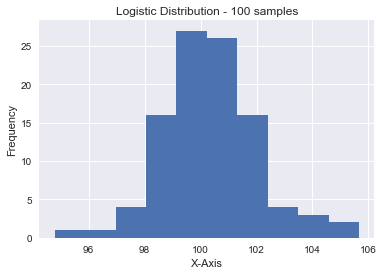

In [34]:
dist_dict['logistic'] = np.random.logistic(loc=100, size=100)

plt.hist(dist_dict['logistic'])
plt.xlabel('X-Axis')
plt.ylabel('Frequency')
plt.title('Logistic Distribution - 100 samples')

In [35]:
print("Logistic distribution with a mean of {:.2f} and a standard deviation of {:.2f}."\
      .format(dist_dict['logistic'].mean(), dist_dict['logistic'].std()))

Logistic distribution with a mean of 100.32 and a standard deviation of 1.65.


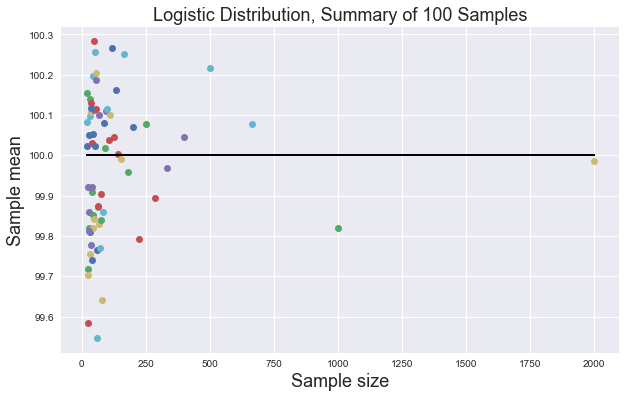

In [36]:
dist_dict['logistic'] = {} 

for n in mysize:
    dist_dict['logistic'][n] = np.random.logistic(loc=100, size=100)
    
dist_dict['logistic']['means'] = {}
ax_norm = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dist_dict['logistic']:
    if not type(nn) == str:
        dist_dict['logistic']['means'][nn] = dist_dict['logistic'][nn].mean()
        
        ax_norm.plot(nn, dist_dict['logistic']['means'][nn], 'o')
        ax_norm.set_xlabel('Sample size', fontsize=18)
        ax_norm.set_ylabel('Sample mean', fontsize=18)
        ax_norm.set_title('Logistic Distribution, Summary of 100 Samples', fontsize=18)
        ax_norm.plot([min(mysize), max(mysize)], [df, df], 'k')

<b>Plot distributions of sample means as a histogram for all distributions</b>

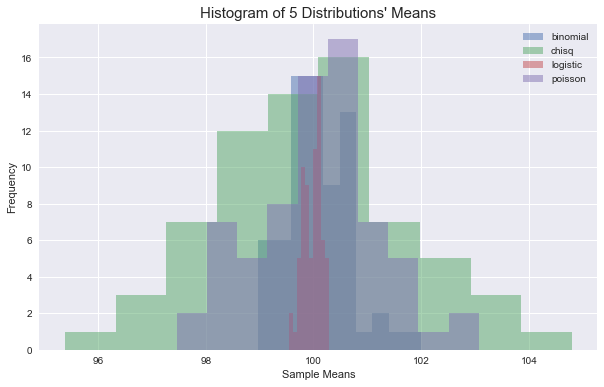

In [39]:
ax_combined = plt.figure(figsize=(10,6)).add_subplot(111)

for elem in dist_dict.keys():
    plt.hist(dist_dict[elem]['means'].values(), alpha=0.5, label = elem)
    plt.legend(loc='upper right')
    plt.title("Histogram of 5 Distributions' Means", fontsize=15)
    plt.xlabel('Sample Means')
    plt.ylabel('Frequency')

<b>Observation: histogram of sampled means resembles normal/gaussian distribution (Central Limit Theorem!)</b>